# EDA of User, Song, and Artist data

Some datasets were created through the _loading_data.ipynb_ notebook


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

Description from http://millionsongdataset.com/pages/field-list/

| Field name                  | Type           | Description                                   |
| --------------------------- | -------------- | --------------------------------------------- |
| analysis sample rate        | float          | sample rate of the audio used                 |
| artist 7digitalid           | int            | ID from 7digital.com or -1                    |
| artist familiarity          | float          | algorithmic estimation                        |
| artist hotttnesss           | float          | algorithmic estimation                        |
| artist id                   | string         | Echo Nest ID                                  |
| artist latitude             | float          | latitude                                      |
| artist location             | string         | location name                                 |
| artist longitude            | float          | longitude                                     |
| artist mbid                 | string         | ID from musicbrainz.org                       |
| artist mbtags               | array string   | tags from musicbrainz.org                     |
| artist mbtags count         | array int      | tag counts for musicbrainz tags               |
| artist name                 | string         | artist name                                   |
| artist playmeid             | int            | ID from playme.com, or -1                     |
| artist terms                | array string   | Echo Nest tags                                |
| artist terms freq           | array float    | Echo Nest tags freqs                          |
| artist terms weight         | array float    | Echo Nest tags weight                         |
| audio md5                   | string         | audio hash code                               |
| bars confidence             | array float    | confidence measure                            |
| bars start                  | array float    | beginning of bars, usually on a beat          |
| beats confidence            | array float    | confidence measure                            |
| beats start                 | array float    | result of beat tracking                       |
| danceability                | float          | algorithmic estimation                        |
| duration                    | float          | in seconds                                    |
| end of fade in              | float          | seconds at the beginning of the song          |
| energy                      | float          | energy from listener point of view            |
| key                         | int            | key the song is in                            |
| key confidence              | float          | confidence measure                            |
| loudness                    | float          | overall loudness in dB                        |
| mode                        | int            | major or minor                                |
| mode confidence             | float          | confidence measure                            |
| release                     | string         | album name                                    |
| release 7digitalid          | int            | ID from 7digital.com or -1                    |
| sections confidence         | array float    | confidence measure                            |
| sections start              | array float    | largest grouping in a song, e.g. verse        |
| segments confidence         | array float    | confidence measure                            |
| segments loudness max       | array float    | max dB value                                  |
| segments loudness max time  | array float    | time of max dB value, i.e. end of attack      |
| segments loudness max start | array float    | dB value at onset                             |
| segments pitches            | 2D array float | chroma feature, one value per note            |
| segments start              | array float    | musical events, ~ note onsets                 |
| segments timbre             | 2D array float | texture features (MFCC+PCA-like)              |
| similar artists             | array string   | Echo Nest artist IDs (sim. algo. unpublished) |
| song hotttnesss             | float          | algorithmic estimation                        |
| song id                     | string         | Echo Nest song ID                             |
| start of fade out           | float          | time in sec                                   |
| tatums confidence           | array float    | confidence measure                            |
| tatums start                | array float    | smallest rythmic element                      |
| tempo                       | float          | estimated tempo in BPM                        |
| time signature              | int            | estimate of number of beats per bar, e.g. 4   |
| time signature confidence   | float          | confidence measure                            |
| title                       | string         | song title                                    |
| track id                    | string         | Echo Nest track ID                            |
| track 7digitalid            | int            | ID from 7digital.com or -1                    |
| year                        | int            | song release year from MusicBrainz or 0       |


_Loading the song and artist metadata_


In [2]:
songs_artists = pd.read_csv("./data/songs_artists.csv")
songs_artists = songs_artists.convert_dtypes()
songs_artists.head()

,track_id,song_id,artist_name_x,song_title,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,...,artist_name_y,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,title,track_7digitalid
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,22050,aee9820911781c734e7694c5432990ca,0,252.05506,2.049,0,...,Faster Pussy cat,44895,<NA>,0,0,Monster Ballads X-Mas,633681,0.542899,Silent Night,7032331
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan,22050,ed222d07c83bac7689d52753610a513a,0,156.55138,0.258,0,...,Karkkiautomaatti,-1,<NA>,0,0,Karkuteillä,145266,0.299877,Tanssi vaan,1514808
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever,22050,96c7104889a128fef84fa469d60e380c,0,138.97098,0.0,0,...,Hudson Mohawke,-1,<NA>,0,0,Butter,625706,0.617871,No One Could Ever,6945353
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés,22050,0f7da84b6b583e3846c7e022fb3a92a2,0,145.05751,0.0,0,...,Yerba Brava,34000,<NA>,0,0,De Culo,199368,<NA>,Si Vos Querés,2168257
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens,22050,228dd6392ad8001b0281f533f34c72fd,0,514.29832,0.0,0,...,Der Mystic,-1,<NA>,0,0,Rene Ablaze Presents Winter Sessions,209038,<NA>,Tangle Of Aspens,2264873


In [3]:
songs_artists.describe()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release_7digitalid,song_hotttnesss,track_7digitalid
count,1001984.0,1001984.0,1001984.0,1001984.0,1001984.0,1001984.0,1001984.0,1001984.0,1001984.0,1001984.0,...,1001972.0,357934.0,357934.0,1001984.0,0.0,1001984.0,1001984.0,1001984.0,583445.0,1001984.0
mean,22050.0,0.0,249.504426,0.819516,0.0,0.0,0.0,0.0,0.0,0.0,...,0.380357,39.002854,-58.384759,26256.996594,<NA>,0.0,0.0,379853.746742,0.356891,4213682.34926
std,0.0,0.0,126.220049,3.301786,0.0,0.0,0.0,0.0,0.0,0.0,...,0.126556,15.190367,54.944549,47021.823634,<NA>,0.0,0.0,237386.64934,0.234874,2639962.883928
min,22050.0,0.0,0.31302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-53.1,-162.4365,-1.0,<NA>,0.0,0.0,-1.0,0.0,-1.0
25%,22050.0,0.0,180.76689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.336414,34.07292,-91.52382,-1.0,<NA>,0.0,0.0,179719.0,0.21508,1974705.0
50%,22050.0,0.0,228.85832,0.194,0.0,0.0,0.0,0.0,0.0,0.0,...,0.386373,40.65507,-77.36692,63.0,<NA>,0.0,0.0,350890.5,0.377532,3948428.5
75%,22050.0,0.0,289.88036,0.432,0.0,0.0,0.0,0.0,0.0,0.0,...,0.444646,47.60356,-2.23218,33899.0,<NA>,0.0,0.0,582712.0,0.533155,6467147.5
max,22050.0,0.0,3034.90567,1163.941,0.0,0.0,0.0,0.0,0.0,0.0,...,1.082503,70.69576,178.69096,242965.0,<NA>,0.0,0.0,823654.0,1.0,9091277.0


In [4]:
# Sort the dataframe by column names
songs_artists = songs_artists[sorted(songs_artists.columns.tolist())]
songs_artists.head()

,analysis_sample_rate,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,...,song_hotttnesss,song_id,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
0,22050,<NA>,4069,0.649822,0.394032,ARYZTJS1187B98C555,<NA>,<NA>,<NA>,357ff05d-848a-44cf-b608-cb34b5701ae5,...,0.542899,SOQMMHC12AB0180CB8,Silent Night,236.635,87.002,4,0.94,Silent Night,7032331,TRMMMYQ128F932D901
1,22050,<NA>,113480,0.439604,0.356992,ARMVN3U1187FB3A1EB,<NA>,<NA>,<NA>,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,...,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,148.66,150.778,1,0.0,Tanssi vaan,1514808,TRMMMKD128F425225D
2,22050,<NA>,63531,0.643681,0.437504,ARGEKB01187FB50750,55.8578,"Glasgow, Scotland",-4.24251,3d403d44-36ce-465c-ad43-ae877e65adc4,...,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,138.971,177.768,4,0.446,No One Could Ever,6945353,TRMMMRX128F93187D9
3,22050,<NA>,65051,0.448501,0.372349,ARNWYLR1187B9B2F9C,<NA>,<NA>,<NA>,12be7648-7094-495f-90e6-df4189d68615,...,<NA>,SOBNYVR12A8C13558C,Si Vos Querés,138.687,87.433,4,0.0,Si Vos Querés,2168257,TRMMMCH128F425532C
4,22050,<NA>,158279,0.0,0.0,AREQDTE1269FB37231,<NA>,<NA>,<NA>,<NA>,...,<NA>,SOHSBXH12A8C13B0DF,Tangle Of Aspens,506.717,140.035,4,0.315,Tangle Of Aspens,2264873,TRMMMWA128F426B589


## EDA of song and artist metadata


Dropping any duplicates


In [5]:
songs_artists.drop_duplicates(inplace=True)
songs_artists.reset_index(inplace=True, drop=True)

Dropping all features with only 1 item


In [6]:
drop_cols = []
for col in songs_artists.columns:
    if songs_artists[col].unique().shape[0] == 1:
        drop_cols.append(col)
songs_artists.drop(columns=drop_cols, inplace=True)
drop_cols

['analysis_sample_rate',
 'analyzer_version',
 'danceability',
 'energy',
 'genre',
 'idx_artist_terms',
 'idx_bars_confidence',
 'idx_bars_start',
 'idx_beats_confidence',
 'idx_beats_start',
 'idx_sections_confidence',
 'idx_sections_start',
 'idx_segments_confidence',
 'idx_segments_loudness_max',
 'idx_segments_loudness_max_time',
 'idx_segments_loudness_start',
 'idx_segments_pitches',
 'idx_segments_start',
 'idx_segments_timbre',
 'idx_similar_artists',
 'idx_tatums_confidence',
 'idx_tatums_start']

New columns left


In [7]:
songs_artists.columns

Index(['artist_7digitalid', 'artist_familiarity', 'artist_hotttnesss',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_mbid', 'artist_name_x', 'artist_name_y', 'artist_playmeid',
       'audio_md5', 'duration', 'end_of_fade_in', 'key', 'key_confidence',
       'loudness', 'mode', 'mode_confidence', 'release', 'release_7digitalid',
       'song_hotttnesss', 'song_id', 'song_title', 'start_of_fade_out',
       'tempo', 'time_signature', 'time_signature_confidence', 'title',
       'track_7digitalid', 'track_id'],
      dtype='object')

Fixing the artist_name column by removing entries where they don't match up


In [8]:
(songs_artists["artist_name_x"] == songs_artists["artist_name_y"]).sum() / songs_artists.shape[0]

0.9999481029637199

Looking at entries where they are different


In [9]:
songs_artists.loc[songs_artists["artist_name_x"] != songs_artists["artist_name_y"]]

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name_x,artist_name_y,...,song_hotttnesss,song_id,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
9594,8318,0.816597,0.553661,ARM0P6Z1187FB4D466,<NA>,"Sheffield, South Yorkshire, Engla",<NA>,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,Arctic Monkeys,Richard Hawley And Death Ramps_ Arctic Monkeys,...,0.650677,SOPRYHK12A8AE47858,Bad Woman,130.717,130.663,1,0.0,Bad Woman,1977298,TRMBIVB128F92F8F1C
9596,8318,0.816597,0.577076,ARM0P6Z1187FB4D466,<NA>,"Sheffield, South Yorkshire, Engla",<NA>,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,Richard Hawley And Death Ramps_ Arctic Monkeys,Arctic Monkeys,...,0.650677,SOPRYHK12A8AE47858,Bad Woman,130.775,130.631,1,0.0,Bad Woman,5372518,TRAPTQA128F42341FA
9598,8318,0.816597,0.577076,ARM0P6Z1187FB4D466,<NA>,"Sheffield, South Yorkshire, Engla",<NA>,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,Richard Hawley And Death Ramps_ Arctic Monkeys,Arctic Monkeys,...,0.650677,SOPRYHK12A8AE47858,Bad Woman,130.775,130.631,1,0.0,Bad Woman,3151137,TRAPTQA128F42341FA
9600,8318,0.816597,0.553661,ARM0P6Z1187FB4D466,<NA>,"Sheffield, South Yorkshire, Engla",<NA>,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,Arctic Monkeys,Richard Hawley And Death Ramps_ Arctic Monkeys,...,0.650677,SOPRYHK12A8AE47858,Bad Woman,130.723,130.601,1,0.0,Bad Woman,1977298,TRPGSWL128F42632F8
76431,13447,0.686989,0.620788,ARX9YIP1187B98A656,<NA>,<NA>,<NA>,5ecc3f72-20a6-47a0-8dc5-fb0b3dadeea0,RUN-DMC Featuring Method Man,RUN-DMC Featuring Method Man_ Kenny Cash_ Mike...,...,0.46349,SOUYVJE12AB01855AA,Simmons Incorporated,255.507,182.683,4,0.208,Simmons Incorporated,4497604,TRWYQPL128F9317297
76432,13447,0.686989,0.60663,ARX9YIP1187B98A656,<NA>,<NA>,<NA>,5ecc3f72-20a6-47a0-8dc5-fb0b3dadeea0,RUN-DMC Featuring Method Man_ Kenny Cash_ Mike...,RUN-DMC Featuring Method Man,...,0.46349,SOUYVJE12AB01855AA,Simmons Incorporated,255.17,91.332,4,0.242,Simmons Incorporated,4531854,TRNAKSB128F930FF25
176150,1455,0.827357,0.749062,ARDCFNZ1187FB3DDB0,<NA>,"Madrid, Spain",<NA>,35f866dc-c061-48ba-8157-cf2e0eac4857,Enrique Iglesias / Kelis,Enrique Iglesias,...,0.319234,SOITKXY12A8C14138A,Not In Love,207.766,117.007,4,0.943,No Es Amor,3776241,TRCTULA128F9309025
176151,1455,0.827357,0.752928,ARDCFNZ1187FB3DDB0,<NA>,"Madrid, Spain",<NA>,35f866dc-c061-48ba-8157-cf2e0eac4857,Enrique Iglesias,Enrique Iglesias / Kelis,...,0.319234,SOITKXY12A8C14138A,No Es Amor,209.067,117.003,4,0.914,Not In Love,5441143,TRZKORM128F92F3BF2
181864,30491,0.873627,0.560206,ARMRCET1187FB52049,33.99363,"Hacienda Heights, CA",-117.97092,4f9675d2-f6d5-486c-9b26-33dcca998500,Audiogroove,Fergie,...,<NA>,SOCAENJ12A8C136690,Big Girls Don't Cry,256.319,112.974,4,0.755,Big Girls Don't Cry,2210884,TRCJIHA128F932A564
181865,30491,0.873627,0.562442,ARMRCET1187FB52049,33.99363,"Hacienda Heights, CA",-117.97092,4f9675d2-f6d5-486c-9b26-33dcca998500,Fergie,Audiogroove,...,<NA>,SOCAENJ12A8C136690,Big Girls Don't Cry,251.159,112.965,4,0.706,Big Girls Don't Cry,7019093,TREGGUU128F425EFB7


There are known reported misalignment errors that have been documented via MSD website that I believe is the cause of these duplications. That or maybe songs with multiple artists have been reported twice? Not too sure why. Either way, we will drop these small number of songs from the data because it's such a small number


In [10]:
songs_artists.drop(
    index=songs_artists.loc[songs_artists["artist_name_x"] != songs_artists["artist_name_y"]].index,
    columns=["artist_name_y"],
    inplace=True,
)
songs_artists.rename(columns={"artist_name_x": "artist_name"}, inplace=True)
songs_artists.reset_index(inplace=True, drop=True)
songs_artists.to_csv("./data/songs_artists_cleaned.csv", index=False)

In [11]:
### Generate some data about the remaining columns
summary_stats = []
for col in songs_artists.columns:
    n_unique = songs_artists[col].unique().shape[0]
    n_missing = songs_artists[col].isna().sum()
    datatype = songs_artists[col].dtype
    summary_stats.append(
        [col, datatype, n_unique, n_missing, round(n_missing / songs_artists[col].shape[0], 2)]
    )

print(
    pd.DataFrame(
        summary_stats, columns=["feature", "datatype", "n_unique", "missing", "percent_missing"]
    ).to_markdown()
)

|    | feature                   | datatype   |   n_unique |   missing |   percent_missing |
|---:|:--------------------------|:-----------|-----------:|----------:|------------------:|
|  0 | artist_7digitalid         | Int64      |      44033 |         0 |              0    |
|  1 | artist_familiarity        | Float64    |      47218 |       185 |              0    |
|  2 | artist_hotttnesss         | Float64    |      43476 |        12 |              0    |
|  3 | artist_id                 | string     |      44745 |         0 |              0    |
|  4 | artist_latitude           | Float64    |       2664 |    644010 |              0.64 |
|  5 | artist_location           | string     |       5056 |    487417 |              0.49 |
|  6 | artist_longitude          | Float64    |       2667 |    644010 |              0.64 |
|  7 | artist_mbid               | string     |      38730 |     62573 |              0.06 |
|  8 | artist_name               | string     |      72665 |         0

**Looking at continuous variables**


Looking at _artist familiarity_

Description: 'algorithmic estimation' with no other explanation


|       |   artist_familiarity |
|:------|---------------------:|
| count |          1.00175e+06 |
| mean  |          0.56        |
| std   |          0.14        |
| min   |          0           |
| 25%   |          0.48        |
| 50%   |          0.56        |
| 75%   |          0.64        |
| max   |          1           |


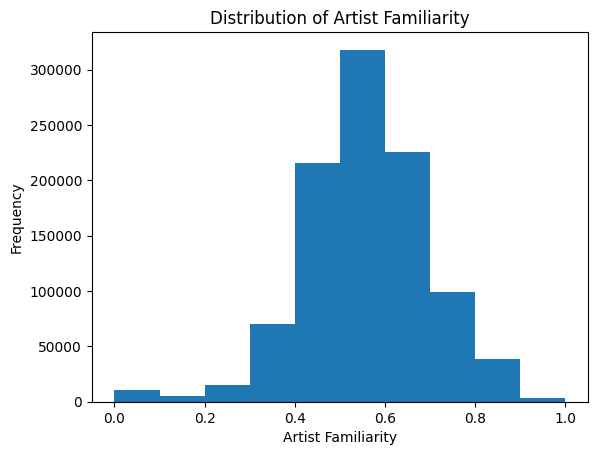

In [12]:
col = "artist_familiarity"
fig, ax = plt.subplots()
songs_artists[col].plot(kind="hist", ax=ax)
ax.set_title("Distribution of Artist Familiarity")
ax.set_xlabel("Artist Familiarity")

print(songs_artists[col].describe().round(2).to_markdown())

The feature Artist Familiarity seems to follow a normal distribution with a mean of 0.56. There is not much information on what these variables mean or how they are calculated from the MSD website.


Looking at _artist hottness_

Description: 'algorithmic estimation'


|       |   artist_hotttnesss |
|:------|--------------------:|
| count |         1.00192e+06 |
| mean  |         0.38        |
| std   |         0.13        |
| min   |         0           |
| 25%   |         0.34        |
| 50%   |         0.39        |
| 75%   |         0.44        |
| max   |         1.08        |


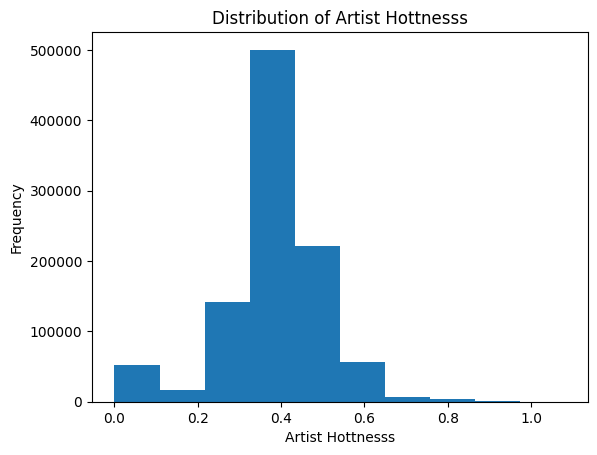

In [13]:
col = "artist_hotttnesss"
fig, ax = plt.subplots()
songs_artists[col].plot(kind="hist", ax=ax)
ax.set_title("Distribution of Artist Hottnesss")
ax.set_xlabel("Artist Hottnesss")

print(songs_artists[col].describe().round(2).to_markdown())

Artist Hotttnesss also follows a normal distribution pattern. The mean of this data is 0.38. There is no explanation on what this variable means or how it is calculated.


Looking at _duration_

Description: 'duration of the track in seconds'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |       duration |
|:------|---------------:|
| count |    1.00193e+06 |
| mean  |  249.5         |
| std   |  126.22        |
| min   |    0.31        |
| 25%   |  180.77        |
| 50%   |  228.86        |
| 75%   |  289.88        |
| max   | 3034.91        |


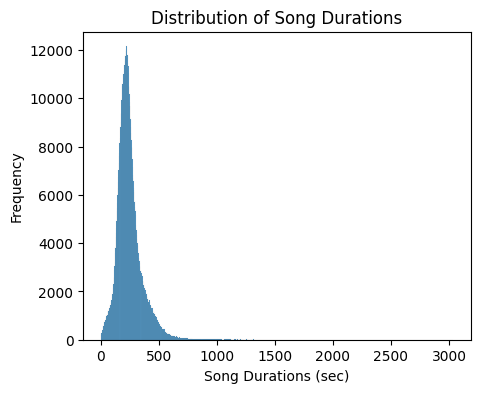

In [14]:
col = "duration"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Song Durations")
ax.set_ylabel("Frequency")
ax.set_xlabel("Song Durations (sec)")

print(songs_artists[col].describe().round(2).to_markdown())

Looking at _end_of_fade_in_

Description: 'time of the end of the fade in, at the beginning of the song, according to The Echo Nest'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |   end_of_fade_in |
|:------|-----------------:|
| count |      1.00193e+06 |
| mean  |      0.82        |
| std   |      3.3         |
| min   |      0           |
| 25%   |      0           |
| 50%   |      0.19        |
| 75%   |      0.43        |
| max   |   1163.94        |


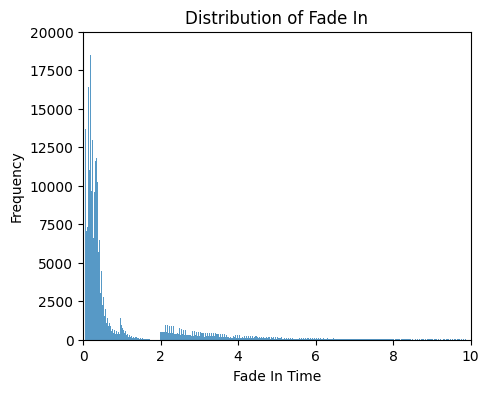

In [15]:
col = "end_of_fade_in"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Fade In")
ax.set_xlim(0, 10)
ax.set_ylim(0, 20000)
ax.set_ylabel("Frequency")
ax.set_xlabel("Fade In Time")

print(songs_artists[col].describe().round(2).to_markdown())

The fade in time data is very skewed because the average is around 0.82 with a std of 3.3. However, 75% of the data is below 0.43 and the max value is 1163. We are not sure how to properly interpret this feature.


Looking at _key_confidence_

Description: 'confidence of the key estimation'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |   key_confidence |
|:------|-----------------:|
| count |      1.00193e+06 |
| mean  |      0.44        |
| std   |      0.28        |
| min   |      0           |
| 25%   |      0.21        |
| 50%   |      0.46        |
| 75%   |      0.65        |
| max   |      1           |


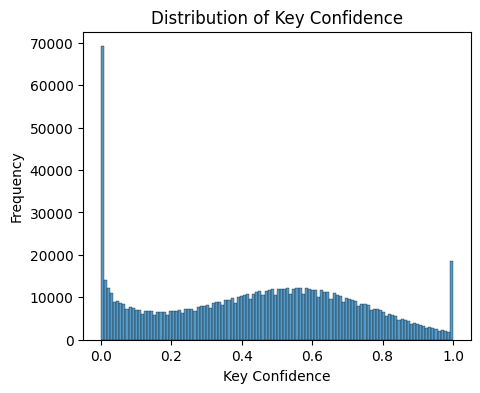

In [16]:
col = "key_confidence"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Key Confidence")
ax.set_ylabel("Frequency")
ax.set_xlabel("Key Confidence")

print(songs_artists[col].describe().round(2).to_markdown())

The distribution of key confidence is fascinating because of the pattern. It looks like the top value is a confidence of 0 and the next being a confidence of 1. We are also not sure if higher confidence is better or lower confidence is better.


Looking at _loudness_

Description: 'general loudness of the track'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |      loudness |
|:------|--------------:|
| count |   1.00193e+06 |
| mean  | -10.12        |
| std   |   5.2         |
| min   | -58.18        |
| 25%   | -12.66        |
| 50%   |  -8.96        |
| 75%   |  -6.38        |
| max   |   4.32        |


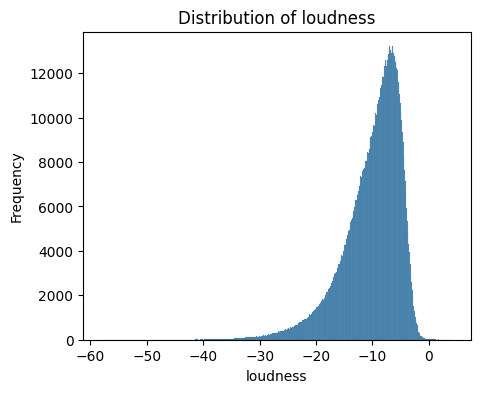

In [17]:
col = "loudness"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of loudness")
ax.set_ylabel("Frequency")
ax.set_xlabel("loudness")

print(songs_artists[col].describe().round(2).to_markdown())

The loudness data distribution follows a left skewed normal distribution.


Looking at _mode_confidence_

Description: 'confidence of the mode estimation'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |   mode_confidence |
|:------|------------------:|
| count |       1.00193e+06 |
| mean  |       0.47        |
| std   |       0.19        |
| min   |       0           |
| 25%   |       0.36        |
| 50%   |       0.48        |
| 75%   |       0.6         |
| max   |       1           |


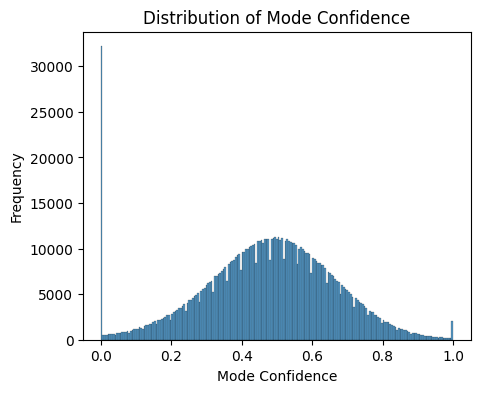

In [18]:
col = "mode_confidence"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Mode Confidence")
ax.set_ylabel("Frequency")
ax.set_xlabel("Mode Confidence")

print(songs_artists[col].describe().round(2).to_markdown())

The mode confidence follows a nice normal distribution with the mean around 0.47 and a sd of 0.19


Looking at _song_hotttnesss_

Description: 'according to The Echo Nest, when downloaded (in December 2010), this song had a 'hotttnesss' of 0.8 (on a scale of 0 and 1)'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |   song_hotttnesss |
|:------|------------------:|
| count |         583409    |
| mean  |              0.36 |
| std   |              0.23 |
| min   |              0    |
| 25%   |              0.22 |
| 50%   |              0.38 |
| 75%   |              0.53 |
| max   |              1    |


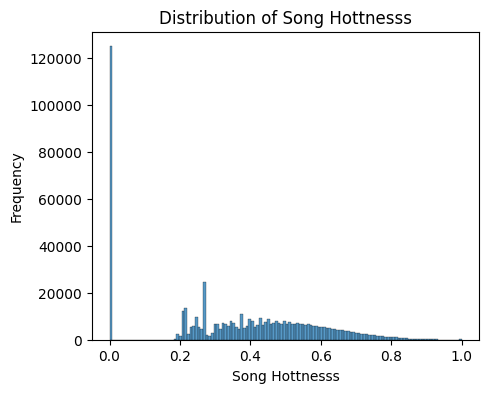

In [19]:
col = "song_hotttnesss"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Song Hottnesss")
ax.set_ylabel("Frequency")
ax.set_xlabel("Song Hottnesss")

print(songs_artists[col].describe().round(2).to_markdown())

The majority of songs have an estimation of 0. However, it looks like most songs that do have a hotness to start at around the 0.2 range.


Looking at _start_of_fade_out_

Description: 'start time of the fade out, in seconds, at the end of the song, according to The Echo Nest'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |   start_of_fade_out |
|:------|--------------------:|
| count |         1.00193e+06 |
| mean  |       240.63        |
| std   |       124.06        |
| min   |         0.31        |
| 25%   |       173.23        |
| 50%   |       219.77        |
| 75%   |       279.67        |
| max   |      3030.62        |


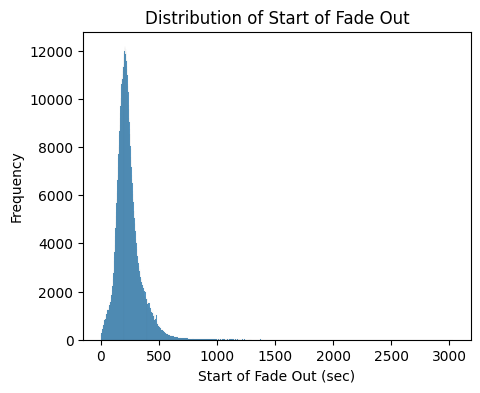

In [20]:
col = "start_of_fade_out"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Start of Fade Out")
ax.set_ylabel("Frequency")
ax.set_xlabel("Start of Fade Out (sec)")

print(songs_artists[col].describe().round(2).to_markdown())

The average song fades out at around the 4 minute (240 seconds). However, songs vary in length, so it's hard to compare these values against each other. There would need to be a normalization applied with respect to the length of each song for this scale to be fair.


Looking at _tempo_

Description: 'tempo in BPM according to The Echo Nest'


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


|       |         tempo |
|:------|--------------:|
| count |   1.00193e+06 |
| mean  | 123.89        |
| std   |  35.05        |
| min   |   0           |
| 25%   |  98           |
| 50%   | 122.09        |
| 75%   | 144.09        |
| max   | 302.3         |


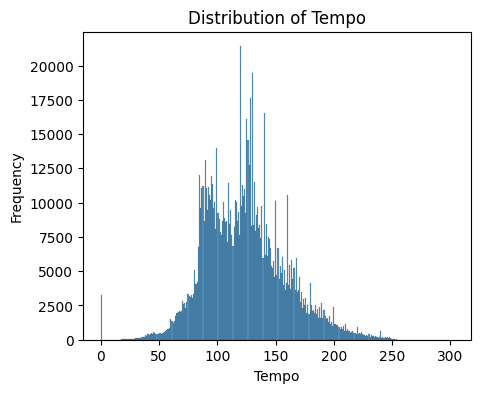

In [21]:
col = "tempo"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Tempo")
ax.set_ylabel("Frequency")
ax.set_xlabel("Tempo")

print(songs_artists[col].describe().round(2).to_markdown())

Tempo follows a normal distribution pattern, but most songs in music will usuall start at a certain tempo. Such as 120, 130, 140. Which leads to these large spikes in the distribution.


Looking at _time_signature_confidence_


|       |   time_signature_confidence |
|:------|----------------------------:|
| count |                 1.00193e+06 |
| mean  |                 0.52        |
| std   |                 0.37        |
| min   |                 0           |
| 25%   |                 0.12        |
| 50%   |                 0.56        |
| 75%   |                 0.87        |
| max   |                 1           |


c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Ryan\miniconda3\envs\cmpe256\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


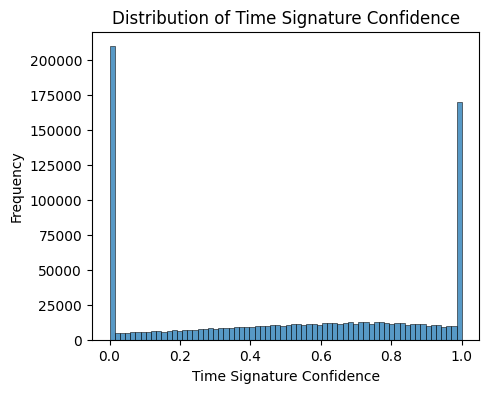

In [22]:
col = "time_signature_confidence"
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=songs_artists[col].values, ax=ax)
ax.set_title("Distribution of Time Signature Confidence")
ax.set_ylabel("Frequency")
ax.set_xlabel("Time Signature Confidence")

print(songs_artists[col].describe().round(2).to_markdown())

The data is very skewed where there is either high confidence or low confidence in the time signature.


**Looking at Discrete Features**


Looking at _artist_location_


In [23]:
songs_artists["artist_location"].value_counts()[:10]

London, England       13256
New York, NY          12494
Los Angeles, CA       11144
California - LA        8604
Chicago, IL            8355
NY - New York City     7504
California             5562
Detroit, MI            5494
Philadelphia, PA       5133
Texas                  4901
Name: artist_location, dtype: Int64

Looking at _key_

Description: estimation of the key the song is in by The Echo Nest


In [24]:
songs_artists["key"].value_counts(normalize=True) * 100  # Percentage of songs

7     12.716731
0     12.222386
2     11.136085
9     11.013721
1      8.389292
11     8.334398
4       8.10544
5      7.300296
10     6.706443
6      5.879341
8      5.173205
3       3.02266
Name: key, dtype: Float64

Because the range of values is between 0-11, we believe these co-inside with the standard scales that start with C. The numbers keys are as follows:

- 0: C
- 1: C# / Db
- 2: D
- 3: D# / Eb
- 4: E
- 5: F
- 6: F# / Gb
- 7: G
- 8: G# / Ab
- 9: A
- 10: A# / Bb
- 11: B

Therefore, we believe the most common key is G followed by C


Looking at _mode_

Description: 'estimation of the mode the song is in by The Echo Nest'


In [25]:
songs_artists["mode"].value_counts(normalize=True) * 100

1    66.645641
0    33.354359
Name: mode, dtype: Float64

2/3 of songs have a mode of 1 and the remainder are 0. We are not sure what this means.


Looking at _time_signature_

Description: 'time signature of the song according to The Echo Nest, i.e. usual number of beats per bar'


In [26]:
songs_artists["time_signature"].value_counts(normalize=True) * 100

4    65.668029
1    13.797942
3    12.215799
5     5.748095
7     2.508154
0      0.06198
Name: time_signature, dtype: Float64

The most common time signature is 4 beats per bar. Which is likely a 4/4 time signature.


# EDA of Track-User-Play data


Looking at the user interactions


In [27]:
train_triplets = pd.read_csv("./data/train_triplets.csv")
train_triplets.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


How many users in the dataset


In [28]:
print(
    f"Number of users: {train_triplets['user_id'].unique().shape[0]}\nNumber of songs: {train_triplets['song_id'].unique().shape[0]}"
)

Number of users: 1019318
Number of songs: 384546


There are over 1 million users in the dataset and over 380k songs


Looking at how many times a user listens to each song on average


In [29]:
# Statistics about how many times a user listens to a song
results = train_triplets.groupby(["user_id"])["play_count"].mean()
print(results.describe().round(2).to_markdown())
# each user listens to each song about 3 times

|       |    play_count |
|:------|--------------:|
| count |   1.01932e+06 |
| mean  |   3.12        |
| std   |   3.29        |
| min   |   1           |
| 25%   |   1.46        |
| 50%   |   2.18        |
| 75%   |   3.55        |
| max   | 221.9         |


The mean average number of listens per song is around 3 times. However, the standard deviation is very large with respect to the mean.


Text(0.5, 0, 'Plays per song')

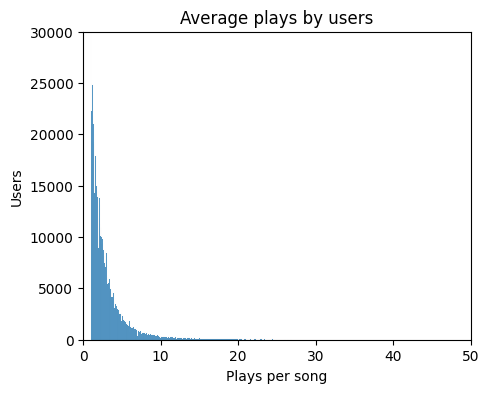

In [30]:
fig, ax = plt.subplots(figsize=(5, 4))
p = sns.histplot(x=results.values, ax=ax)
ax.set_title("Average plays by users")
ax.set_xlim((0, 50))
ax.set_ylim(0, 30000)
ax.set_ylabel("Users")
ax.set_xlabel("Plays per song")

The plot above shows the distribution of average song plays in the dataset


How many songs have only been listened to once?


In [31]:
(train_triplets["play_count"] == 1).sum() / train_triplets.shape[0]
# 59% of songs users have listened to have only been listened to once.

0.5944559495754563

Over 59% of the songs have only been listened to once. This is an indication that each a user might have listened to a song but maybe didn't like it. So that's why they didn't listen to it again.


In [32]:
# Statistics about how many songs a user has listened too
results = train_triplets.groupby(["user_id"])["play_count"].count()
print(results.describe().round(2).to_markdown())

|       |     play_count |
|:------|---------------:|
| count |    1.01932e+06 |
| mean  |   47.46        |
| std   |   57.82        |
| min   |   10           |
| 25%   |   16           |
| 50%   |   27           |
| 75%   |   55           |
| max   | 4400           |


Each user in the dataset has listened to a minimum of around 10 songs with an average of 48. However, the standard deviation is very large again.


Text(0.5, 0, 'Number of songs')

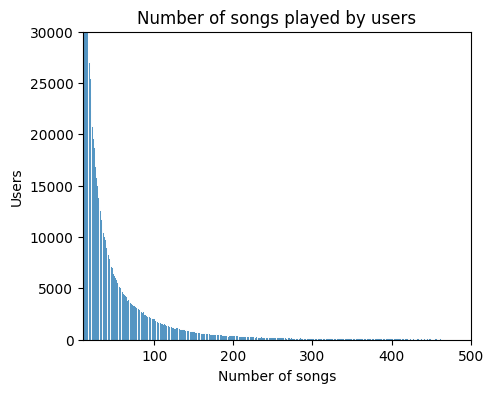

In [33]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(x=results.values, ax=ax)
ax.set_title("Number of songs played by users")
ax.set_xlim((10, 500))
ax.set_ylim(0, 30000)
ax.set_ylabel("Users")
ax.set_xlabel("Number of songs")

The plot above shows the distribution of total songs each user has listened to.


_Loading in the clean songs (optional)_


In [34]:
### Loading in clean songs
songs_artists = pd.read_csv("./data/songs_artists_cleaned.csv")
songs_artists.head(10)

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,...,song_hotttnesss,song_id,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
0,4069,0.649822,0.394032,ARYZTJS1187B98C555,NaN,NaN,NaN,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,44895,...,0.542899,SOQMMHC12AB0180CB8,Silent Night,236.635,87.002,4,0.940,Silent Night,7032331,TRMMMYQ128F932D901
1,113480,0.439604,0.356992,ARMVN3U1187FB3A1EB,NaN,NaN,NaN,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,-1,...,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,148.660,150.778,1,0.000,Tanssi vaan,1514808,TRMMMKD128F425225D
2,63531,0.643681,0.437504,ARGEKB01187FB50750,55.85780,"Glasgow, Scotland",-4.24251,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,-1,...,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,138.971,177.768,4,0.446,No One Could Ever,6945353,TRMMMRX128F93187D9
3,65051,0.448501,0.372349,ARNWYLR1187B9B2F9C,NaN,NaN,NaN,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,34000,...,NaN,SOBNYVR12A8C13558C,Si Vos Querés,138.687,87.433,4,0.000,Si Vos Querés,2168257,TRMMMCH128F425532C
4,158279,0.000000,0.000000,AREQDTE1269FB37231,NaN,NaN,NaN,NaN,Der Mystic,-1,...,NaN,SOHSBXH12A8C13B0DF,Tangle Of Aspens,506.717,140.035,4,0.315,Tangle Of Aspens,2264873,TRMMMWA128F426B589
5,219281,0.361287,0.109626,AR2NS5Y1187FB5879D,NaN,NaN,NaN,d087b377-bab7-46c4-bd12-15debebb5d61,David Montgomery,-1,...,NaN,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",811.799,90.689,4,0.158,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",3360982,TRMMMXN128F42936A5
6,3736,0.692923,0.453732,ARO41T51187FB397AB,NaN,"Mexico City, Mexico",NaN,d2461c0a-5575-4425-a225-fce0180de3fd,Sasha / Turbulence,1396,...,NaN,SOQVRHI12A6D4FB2D7,We Have Got Love,206.629,101.450,1,0.960,We Have Got Love,552626,TRMMMLR128F1494097
7,49941,0.588156,0.401092,AR3Z9WY1187FB4CDC2,NaN,NaN,NaN,bf61e8ff-7621-4655-8ebd-68210645c5e9,Kris Kross,9594,...,NaN,SOEYRFT12AB018936C,2 Da Beat Ch'yall,212.120,98.020,4,0.982,2 Da Beat Ch'yall,6435649,TRMMMBB12903CB7D21
8,15202,0.408465,0.285901,ARA04401187B991E6E,54.99241,"Londonderry, Northern Ireland",-7.31923,1a9bf859-1dc2-495b-9e7c-289be7731a9f,Joseph Locke,61524,...,NaN,SOPMIYT12A6D4F851E,Goodbye,130.479,115.427,1,0.324,Goodbye,8376489,TRMMMHY12903CB53F1
9,76721,0.419941,0.249137,ARCVMYS12454A51E6E,NaN,NaN,NaN,NaN,The Sun Harbor's Chorus-Documentary Recordings,50151,...,NaN,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,104.489,124.339,4,1.000,Mama_ mama can't you see ?,1043208,TRMMMML128F4280EE9


Join with the previous dataframe


In [35]:
df = pd.merge(
    left=train_triplets, right=songs_artists, left_on="song_id", right_on="song_id", how="left"
)  # Left join to capture all the user data, even if song info is missing
df.head()

,user_id,song_id,play_count,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,...,release_7digitalid,song_hotttnesss,song_title,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,1613,0.832012,0.677482,ARC8CQZ1187B98DECA,NaN,"Galveston, TX",NaN,...,192496,0.649006,The Cove,104.049,124.078,4,0.241,The Cove,2093263,TRIQAUQ128F42435AD
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,14048,0.580555,0.482492,ARHYUI71187FB48366,29.76045,"Houston, TX",-95.36978,...,275856,0.826375,Nothing from Nothing,147.249,102.687,4,0.620,Nothing from Nothing,3072847,TRIRLYL128F42539D1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,16688,0.633119,0.417718,ARC1SF21187FB51D0F,NaN,NaN,NaN,...,241239,0.735295,Entre Dos Aguas,348.944,192.975,7,0.392,Entre Dos Aguas,2631392,TRMHBXZ128F4238406
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,27492,0.675339,0.509058,ARMS97V1187B99DD98,41.50075,NE,-99.68095,...,38692,NaN,Under Cold Blue Stars,255.211,108.120,1,1.000,Under Cold Blue Stars,413957,TRYQMNI128F147C1C7
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,14494,0.650281,0.451749,ARI4V0E1187B9B6FC2,53.40977,"Liverpool, England",-2.97848,...,512793,0.754628,Riot Radio (Soundtrack Version),138.374,143.902,1,0.000,Riot Radio (Soundtrack Version),5674853,TRAHZNE128F9341B86


In [36]:
df.shape[0]

52331222

In [37]:
df.columns

Index(['user_id', 'song_id', 'play_count', 'artist_7digitalid',
       'artist_familiarity', 'artist_hotttnesss', 'artist_id',
       'artist_latitude', 'artist_location', 'artist_longitude', 'artist_mbid',
       'artist_name', 'artist_playmeid', 'audio_md5', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'release', 'release_7digitalid', 'song_hotttnesss',
       'song_title', 'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'title', 'track_7digitalid', 'track_id'],
      dtype='object')

Gather some info about users and songs


Looking at the popular songs


In [38]:
## Popular songs
df[["artist_name", "song_title"]].value_counts()[:10]  # Top 10 popular

artist_name             song_title                                       
Kings Of Leon           Use Somebody                                         208320
Coldplay                Yellow                                               154920
Rihanna                 Don't Stop The Music                                 149323
Justin Bieber           Somebody To Love                                     146964
Taylor Swift            Love Story                                           124392
B.o.B                   Nothin' On You [feat. Bruno Mars] (Album Version)    120468
Harmonia                Sehr kosmisch                                        110479
Evanescence             Bring Me To Life                                     109106
Björk                   Undo                                                  90476
Florence + The Machine  Dog Days Are Over (Radio Edit)                        90444
dtype: int64

In [39]:
gc.collect()  # Garbage collecting to help with space

840

Popular artists


In [40]:
df.groupby(["artist_name"])["play_count"].sum().sort_values(ascending=False)[:10]

artist_name
Kings Of Leon             1640202
Coldplay                  1361695
Muse                      1093876
Evanescence                955470
Justin Bieber              904062
Eminem                     826637
Florence + The Machine     785681
Jack Johnson               762196
Taylor Swift               757154
Dwight Yoakam              733757
Name: play_count, dtype: int64

Popular albums (release)


In [41]:
df.groupby(["artist_name", "release"])["play_count"].sum().sort_values(ascending=False)[:10]

artist_name                                                             release                         
Evanescence                                                             Fallen                              780108
Kings Of Leon                                                           Only By The Night                   747420
Dwight Yoakam                                                           If There Was A Way                  726994
Björk                                                                   Vespertine Live                     658307
Justin Bieber                                                           My Worlds                           586198
OneRepublic                                                             Waking Up                           440982
Train                                                                   Save Me_ San Francisco              426493
Harmonia                                                                Musik von Harmonia

Popular time signatures


In [42]:
df.groupby(["time_signature"])["play_count"].sum().sort_values(ascending=False)[:10]

time_signature
4    109145282
3     15947419
1     13922902
5      7071787
7      3158413
0        37108
Name: play_count, dtype: int64

Most popular time signature listened to is 4 beats per beat (4/4) followed by 3 beats (3/4), then 1 beat (1/4).


Popular tempos listened to


In [43]:
df[["tempo", "play_count"]].round(0).groupby(["tempo"])["play_count"].sum().sort_values(
    ascending=False
).head(10)

tempo
120.0    3834902
130.0    3206757
87.0     3059263
96.0     2675383
140.0    2552693
150.0    2523524
128.0    2495133
90.0     2492481
123.0    2415494
100.0    2374717
Name: play_count, dtype: int64

120 is the most common tempo, which is typical for rock music. Followed by 130. The tempos 87 and 96 are a more common for more chill music like instrumentals, jazz, rnb and some country. 140 and 150 are a common tempo for upbeat music such as dance music.


Hottest songs


In [44]:
df.groupby(["artist_name", "title"])["song_hotttnesss"].max().sort_values(ascending=False)[:10]

artist_name      title                             
Metric           Gold Guns Girls                       1.0
John Mayer       Waiting On The World To Change        1.0
Paramore         The Only Exception (Album Version)    1.0
The Black Keys   Howlin For You                       1.0
Maria Gadú       Shimbalaiê                            1.0
The xx           Basic Space                           1.0
Dido             White Flag                            1.0
The Kooks        Naive                                 1.0
Linkin Park      In The End (Live In Texas)            1.0
Michael Jackson  The Way You Make Me Feel              1.0
Name: song_hotttnesss, dtype: float64